In [9]:
import os
os.chdir("../")

In [10]:
!pwd

/workspaces/example_digital-twin_incubator_twright


# Incubator Case Study

In [11]:
from verified_twin.lbuc import *

from sage.symbolic.function_factory import function_factory

from verified_twin.base import *
from verified_twin.parametric_models import ParametricModel
from verified_twin.incubator_models import SwitchingFourParameterModel
from verified_twin.controllers import BasicController, TrivialController, SignalSwitchedController
from verified_twin.simulators import VerifiedContinuousSimulator, DiscreteSimulator, HybridSimulator

In [12]:
var("t, T_S, T_H, T_A, T_F, C_S, C_H, C_A, C_F, I, T_R, G_S, G_H, G_B, G_F, V")

(t, T_S, T_H, T_A, T_F, C_S, C_H, C_A, C_F, I, T_R, G_S, G_H, G_B, G_F, V)

In [13]:
intervalfourpm = SwitchingFourParameterModel([RIF("0"), RIF('25'), RIF('[20.5935,21.5935]')])

In [14]:
fourpm = SwitchingFourParameterModel([RIF("0"), RIF('25'), RIF('22.5935')])

### Periodic Open Loop Controller

In [15]:
from verified_twin.controllers import PeriodicOpenLoopController

In [16]:
fspm = HybridSimulator(
    intervalfourpm,
    PeriodicOpenLoopController(3.0, 10, 1),
    controller_input_map=(lambda x: x[0]),
    controller_output_map=(lambda xin, x: xin),
)

In [17]:
rs = fspm.run(time_limit=RIF(200))

In [18]:
rs.values

[{'heater_on': False, 'current_state': <OpenLoopState.FIRST: 4>},
 {'heater_on': False, 'current_state': <OpenLoopState.INITIALIZED: 1>},
 {'heater_on': False, 'current_state': <OpenLoopState.HEATING: 2>},
 {'heater_on': True, 'current_state': <OpenLoopState.COOLING: 3>},
 {'heater_on': False, 'current_state': <OpenLoopState.HEATING: 2>},
 {'heater_on': True, 'current_state': <OpenLoopState.COOLING: 3>},
 {'heater_on': False, 'current_state': <OpenLoopState.HEATING: 2>},
 {'heater_on': True, 'current_state': <OpenLoopState.COOLING: 3>},
 {'heater_on': False, 'current_state': <OpenLoopState.HEATING: 2>},
 {'heater_on': True, 'current_state': <OpenLoopState.COOLING: 3>},
 {'heater_on': False, 'current_state': <OpenLoopState.HEATING: 2>},
 {'heater_on': True, 'current_state': <OpenLoopState.COOLING: 3>},
 {'heater_on': False, 'current_state': <OpenLoopState.HEATING: 2>},
 {'heater_on': True, 'current_state': <OpenLoopState.COOLING: 3>},
 {'heater_on': False, 'current_state': <OpenLoopStat

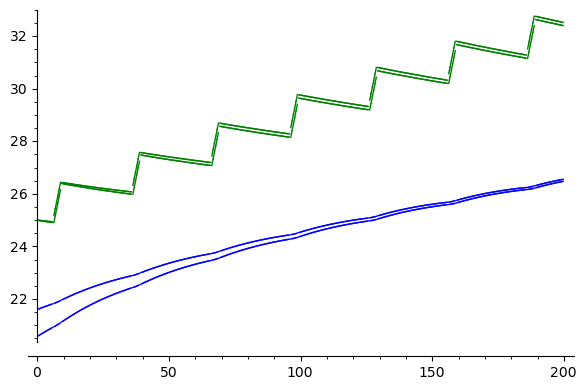

In [19]:
rs.plot(('T_A', 'T_H'), color=('blue', 'green'))